# Computación Científica - Tarea 2
---
Vicente Lizana Estivill  
vlizana@alumnos.inf.utfsm.cl  
201310004-K

---

## Introducción
---



En esta tarea analizaremos los diferentes métodos de cuadratura, en particular estudiaremos su comportamiento al integrar funciones cuyas derivadas no son fáciles de calcular. La idea es visualizar el orden de convergencia de los diferentes métodos en distintas condiciones, ayudandonos del _framework_ disponible en los _notebooks_ del curso.

---

## Desarrollo y Análisis de Resultados
---

### Bibliotecas
---

In [1]:
import numpy as np
import scipy
from scipy import special
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import IntSlider
from matplotlib import rc
import time 
%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
rc('xtick', labelsize=14) 
rc('ytick', labelsize=14) 
rc('axes', labelsize=20)

---
### Utilidades
---

In [3]:
# plotting framework
def plot(f, xbin, ybin, int_val, N, a, b, text, figname=""):
    plt.figure(figsize=(12,6))
    n = 201
    x = np.linspace(xbin.min(), xbin.max(), n)
    y = f(x)
    plt.plot(x, y, 'r', lw=2.0)
    plt.fill_between(xbin, 0, ybin, alpha=0.25, lw=2.0)
    ymin, ymax = y.min(), y.max()
    if abs(ymax-ymin)<1E-6:
        ymin, ymax = 0.0, 1.0
    dy = .1*(ymax-ymin)
    plt.ylim([ymin-dy,ymax+dy])
    xmin, xmax = x.min(), x.max()
    if abs(b-a)<1E-6:
        xmin, xmax = 0.0, 1.0
    dx = .1*(b-a)
    plt.xlim([xmin-dx,xmax+dx])
    if N>1:
        text_N = r"$%s \approx %.5f$ (usando %d evaluaciones de $f$)" %(text, int_val, N)
        plt.text(min(x), max(y), text_N, fontsize=18)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

In [4]:
# convergence framework
def get_error(quadrature_rule, myfun, Nrange, a, b, true_value):
    quad_error = []
    for N in Nrange:
        error = np.abs(true_value - quadrature_rule(myfun, N, a, b) )
        if error<1E-16:
            quad_error.append(1E-16)
        else:
            quad_error.append(error)
    return quad_error

def set_ylim(ymin, ymax):
    ymin = min(plt.ylim()[0], ymin)
    ymax = max(plt.ylim()[1], ymax)
    plt.ylim([ymin, ymax])
    return

def convergence(Nrange, myfun, a, b, true_value, n, x):
    ms = 10
    f = np.vectorize(myfun)
    e_mp = get_error(midpoint, myfun, Nrange, a, b, true_value)
    e_tr = get_error(trapezoid, myfun, Nrange, a, b, true_value)
    e_sp = get_error(simpsons, myfun, Nrange, a, b, true_value)
    e_gq = get_error(gaussianquad, myfun, Nrange, a, b, true_value)
    plt.figure(figsize=(12,16))
    ax = plt.subplot(4,1,1)
    plt.title(r"\Huge $n = {0};\quad J_{0}({1})$".format(n, x))
    dd = 0.1*(b-a)
    x = np.linspace(a-dd, b+dd, 1000)
    plt.plot(x, f(x), 'k', label="f(x)", lw=2.0)
    x = np.linspace(a, b, 1000)
    plt.fill_between(x, f(x), 0, alpha=0.5, label=r"$\int_a^b f(x) dx$")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    ymax = 1.05*plt.ylim()[1]
    plt.ylim([-ymax, ymax])
    plt.grid('on')
    plt.legend(loc="lower left")
    ax = plt.subplot(4,1,2) 
    plt.plot(Nrange, e_mp, 'sb', lw=2.0, ms=ms, label="Midpoint")
    plt.plot(Nrange, e_tr, 'or', lw=2.0, ms=ms, label="Trapezoid")
    plt.plot(Nrange, e_gq, 'Dg', lw=2.0, ms=ms, label="Gaussian Quad")
    plt.plot(Nrange, e_sp, '>y', lw=2.0, ms=ms, label="Simpsons")
    set_ylim(-5E-2, 1E-1)
    plt.xlabel("N")
    plt.ylabel("Error")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00),
          ncol=4, fancybox=True, shadow=True, numpoints=1)
    plt.grid('on')
    plt.subplot(4,1,3)
    plt.loglog(Nrange, e_mp, 'sb', ms=ms, lw=2.0)
    plt.loglog(Nrange, e_tr, 'or', ms=ms, lw=2.0)
    plt.loglog(Nrange, e_sp, '>y', ms=ms, lw=2.0)
    plt.loglog(Nrange, e_gq, 'Dg', ms=ms, lw=2.0)
    set_ylim(1E-18, 1E+1)
    N = np.arange(1,101,10)
    plt.loglog(N, 1./N, '-k', lw=2.0, alpha=0.5)
    plt.loglog(N, 1./N**2, '-k', lw=2.0, alpha=0.5)
    plt.loglog(N, 1./N**3, '-k', lw=2.0, alpha=0.5)
    plt.loglog(N, 1./N**4, '-k', lw=2.0, alpha=0.5)
    plt.xlabel("N")
    plt.ylabel("Error")
    plt.grid('on')
    plt.subplot(4,1,4)
    h = 1./np.arange(1,101,10)
    plt.loglog(h, h, '-k', lw=2.0, alpha=0.5)
    plt.loglog(h, h**2, '-k', lw=2.0, alpha=0.5)
    plt.loglog(h, h**3, '-k', lw=2.0, alpha=0.5)
    plt.loglog(h, h**4, '-k', lw=2.0, alpha=0.5)
    h = 1./np.array(Nrange)
    plt.loglog(h, e_gq, 'Dg', lw=2.0, ms=ms)
    plt.loglog(h, e_mp, 'sb', lw=2.0, ms=ms)
    plt.loglog(h, e_tr, 'or', lw=2.0, ms=ms)
    plt.loglog(h, e_sp, '>y', lw=2.0, ms=ms)
    set_ylim(1E-18, 1E+1)
    plt.xlabel("h")
    plt.ylabel("Error")
    plt.grid('on')
    plt.show()

---
### Cuadraturas
---

In [5]:
def riemann(myfun, N, a, b, direction="left", verbose=False, text="", figname=""):
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
    dx = x[1]-x[0]
    if direction=="left":
        points = x[:-1]
    elif direction=="right":
        points = x[1:]
    else:
        print("Riemann Sum: choose left or right")
        return
    point_values = f(points)
    int_val = sum(point_values*dx)
    if verbose:
        xbin = np.vstack([x[:-1], x[1:]]).flatten(1)
        ybin = np.vstack([point_values, point_values]).flatten(1)
        plot(f, xbin, ybin, int_val, N, a, b, text, figname)
    return int_val

In [6]:
def midpoint(myfun, N, a, b, verbose=False, text="", figname=""):
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
    dx = x[1]-x[0]
    midpoints = x[:-1] + .5*dx
    midpoint_values = f(midpoints)
    int_val = sum(midpoint_values*dx)
    if verbose:
        xbin = np.vstack([x[:-1], x[1:]]).flatten(1)
        ybin = np.vstack([midpoint_values, midpoint_values]).flatten(1)
        plot(f, xbin, ybin, int_val, N, a, b, text, figname)
    return int_val

In [7]:
def trapezoid(myfun, N, a, b, verbose=False, text="", figname=""):
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    x = np.linspace(a, b, N+1) # We want N bins, so N+1 points  
    h = x[1]-x[0]
    xmiddle = x[1:-1]
    #int_val = 0.5*h*sum(f(x[0])+2*f(xmiddle)+f(x[-1]))
    int_val = 0.5*h*(f(x[0])+2*np.sum(f(xmiddle))+f(x[-1]))
    if verbose:
        xbin = x
        ybin = f(x) 
        plot(f, xbin, ybin, int_val, N, a, b, text, figname)
    return int_val

In [8]:
def simpsons(myfun, N, a, b, verbose=False, text="", figname=""):
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    x = np.linspace(a, b, N+1) # We want N bins, so N+1 points
    if N%2==1:
        if verbose: print("Simpsons rule only applicable to even number of segments")
        return np.nan
    dx = x[1]-x[0]
    xleft   = x[:-2:2]
    xmiddle = x[1::2]
    xright  = x[2::2]
    int_val = sum((f(xleft)+4*f(xmiddle)+f(xright))*dx/3)
    if verbose:
        xbin, ybin = simpsons_bins(f, xleft, xmiddle, xright)
        plot(f, xbin, ybin, int_val, N, a, b, text, figname)
    return int_val

def simpsons_bins(f, xleft, xmiddle, xright):
    xbin, ybin = [], []
    n = 21
    for x0, x1, x2 in zip(xleft, xmiddle, xright):
        x = np.linspace(x0, x2, n)
        y = (f(x0)*(x-x1)*(x-x2)) / ((x0-x1)*(x0-x2))
        y+= (f(x1)*(x-x0)*(x-x2)) / ((x1-x0)*(x1-x2))
        y+= (f(x2)*(x-x0)*(x-x1)) / ((x2-x0)*(x2-x1))
        xbin.extend(list(x))
        ybin.extend(list(y))
    return np.array(xbin), np.array(ybin)

In [9]:
def gaussianquad(myfun, N, a, b, verbose=False, text="", figname=""):
    f = np.vectorize(myfun) # So we can apply it to arrays without trouble
    x, w = gaussian_nodes_and_weights(N, a, b)
    int_val = sum( w * f(x) )
    if verbose:
        xbin, ybin = gaussian_bins(f, x, w, a)
        plot(f, xbin, ybin, int_val, N, a, b, text, figname)
    return int_val

def gaussian_nodes_and_weights(N, a, b):
    if N==1: return np.array([1]), np.array([2])
    beta = .5 / np.sqrt(1.-(2.*np.arange(1.,N))**(-2))
    T = np.diag(beta,1) + np.diag(beta,-1)
    D, V = np.linalg.eigh(T)
    x = D
    x = .5 * ( (b-a)*x + b + a) # Rescaling
    w = 2*V[0,:]**2
    w = .5*(b-a)*w
    return x, w

def gaussian_bins(f, x, w, a):
    z = [a] + list(a + w.cumsum())
    xbin = np.vstack([z[:-1], z[1:]]).flatten(1)
    z = f(x)
    ybin = np.vstack([z[:], z[:]]).flatten(1)
    return np.array(xbin), np.array(ybin)

---
### Pregunta 1

Analice la convergencia numérica al evaluar $J_{n}(x) = \dfrac{1}{\pi} \displaystyle{\int_{0}^{\pi} \cos(n\tau-x\,\sin(\tau))\, d\tau}$ con los siguientes métodos de integración numérica: suma de reimann por la izquierda, _midpoint_, _simpson_, _trapezoid_ y cuadratura gaussiana, para lo siguientes valores de $x\in \{0,0.1,\pi,7\}$. Genere un gráfico para cada valor de $x$ donde se observen los cinco métodos. Usted debe elegir el rango del número de puntos de integración para cada método y, dentro de lo posible, mostrar la saturación numérica al incrementar el número de puntos.

Comente cualquier tipo de tendencia o comportamiento inesperado observado. 

---

In [10]:
myfun = lambda n, x, tau: np.cos(n*tau - x*np.sin(tau)) / np.pi
text= r"\frac{1}{\pi} \int_{0}^{\pi} \cos(n\tau - x\sin(\tau)) d\tau"

Creamos un widget para cada cuadratura, para poder revisar el comportamiento de manera interactiva. Posteriormente se encuentran los gráficos cuantitativos de convergencia para los diferentes valores de $x$ solicitados.

In [11]:
def fixed_fun(func, n, x):
    return lambda tau: func(n, x, tau)

def test_some_func(myfun, method, text, n, x, N, a, b):
    f = fixed_fun(myfun, n, x)
    method(f, N, a, b, verbose=True, text=text)
    
def fixed_convergence(myfun, n, x):
    convergence(range(2, 50), fixed_fun(myfun, n, x), 0, np.pi, scipy.special.jn(n,x), n, x)

In [12]:
n = (0, 10, 1)
x = [0, 0.1, np.pi, 7]
N = (5, 100, 1)
methods = {
    "Riemann" : riemann,
    "Midpoint" : midpoint,
    "Trapezoid" : trapezoid,
    "Simpson's" : simpsons,
    "Gaussian" : gaussianquad
}

In [13]:
interact(
    test_some_func,
    myfun=fixed(myfun),
    method=methods,
    text=fixed(text),
    n=n, x=x, N=N,
    a=fixed(0),
    b=fixed(np.pi))

A Jupyter Widget

<function __main__.test_some_func>

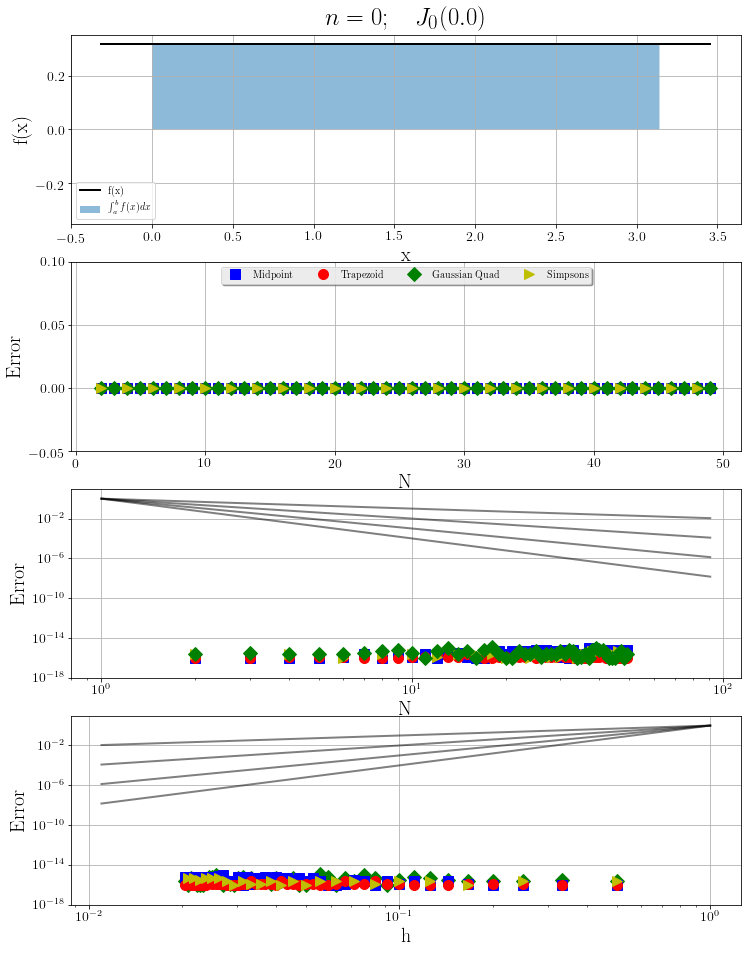

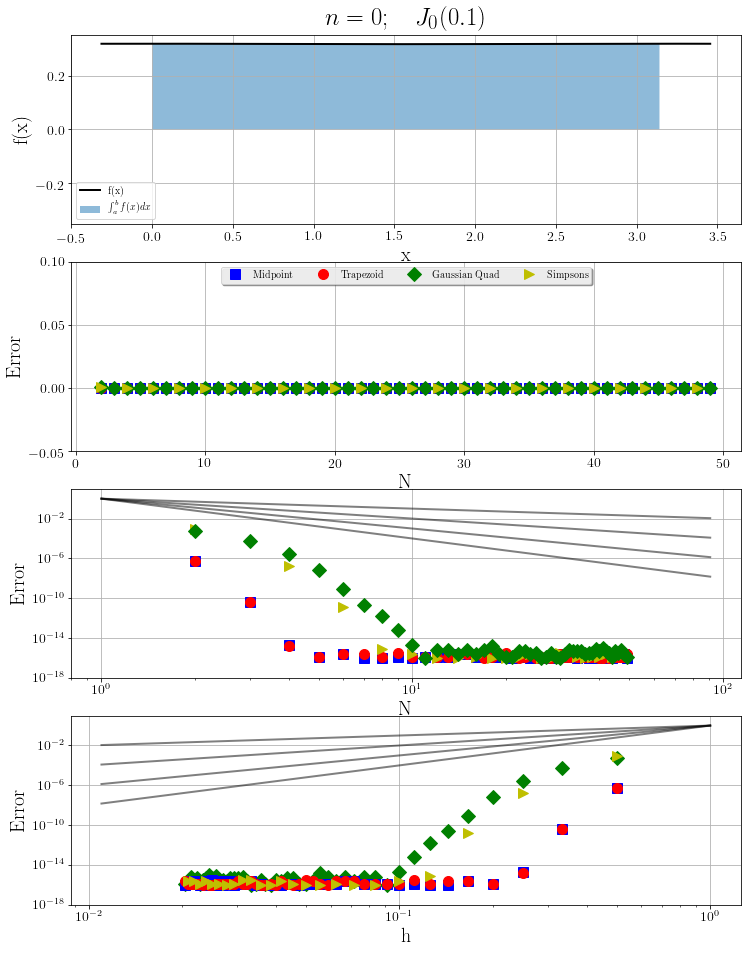

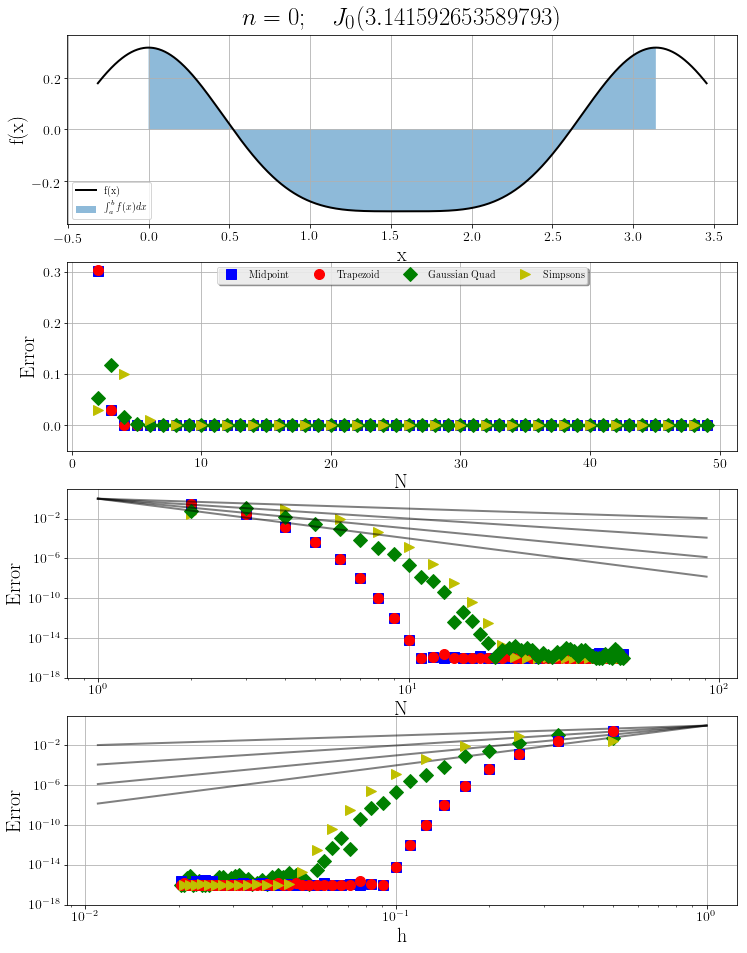

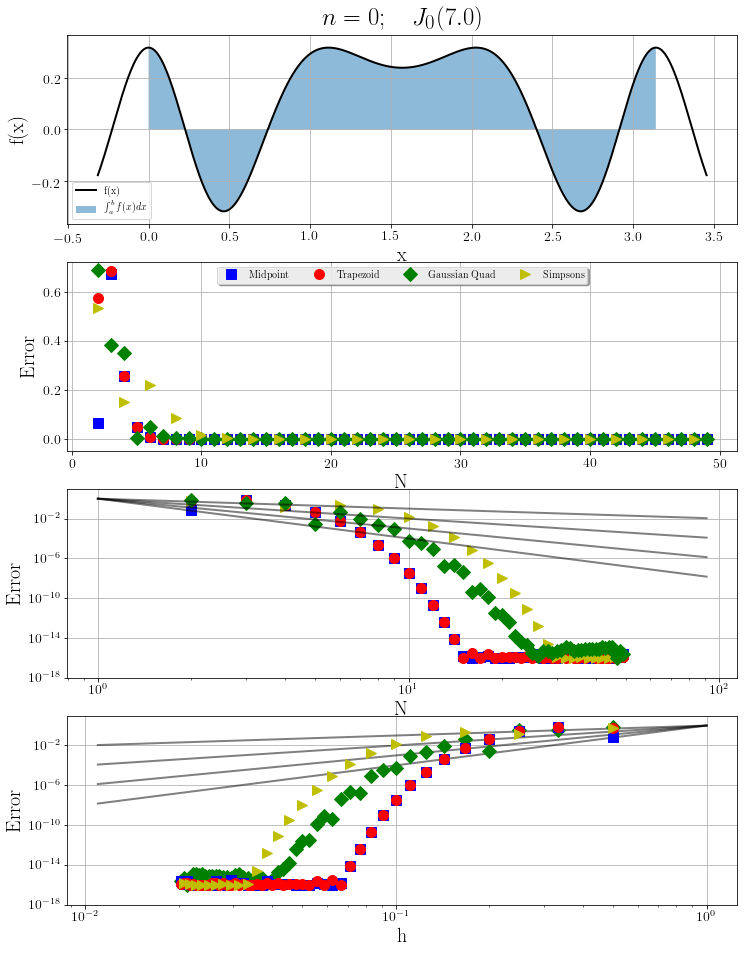

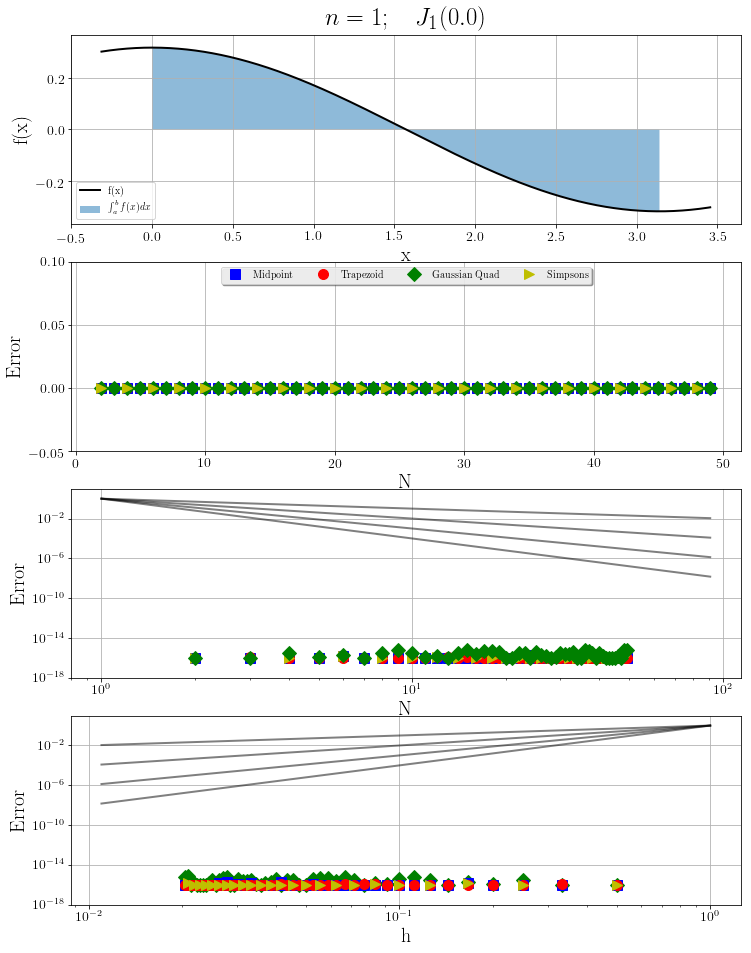

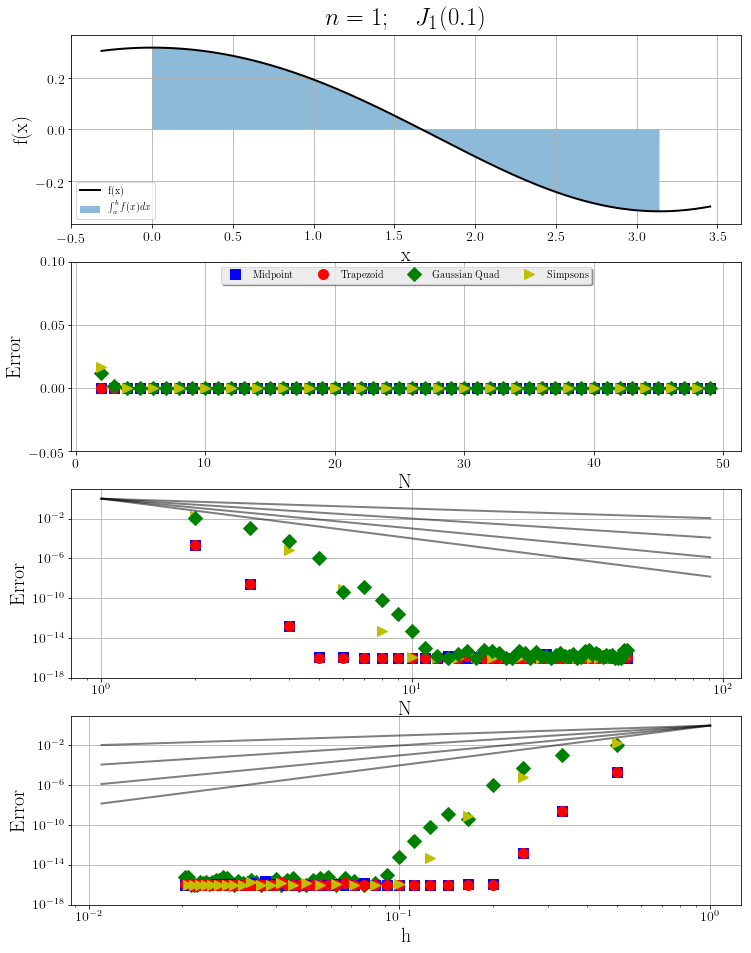

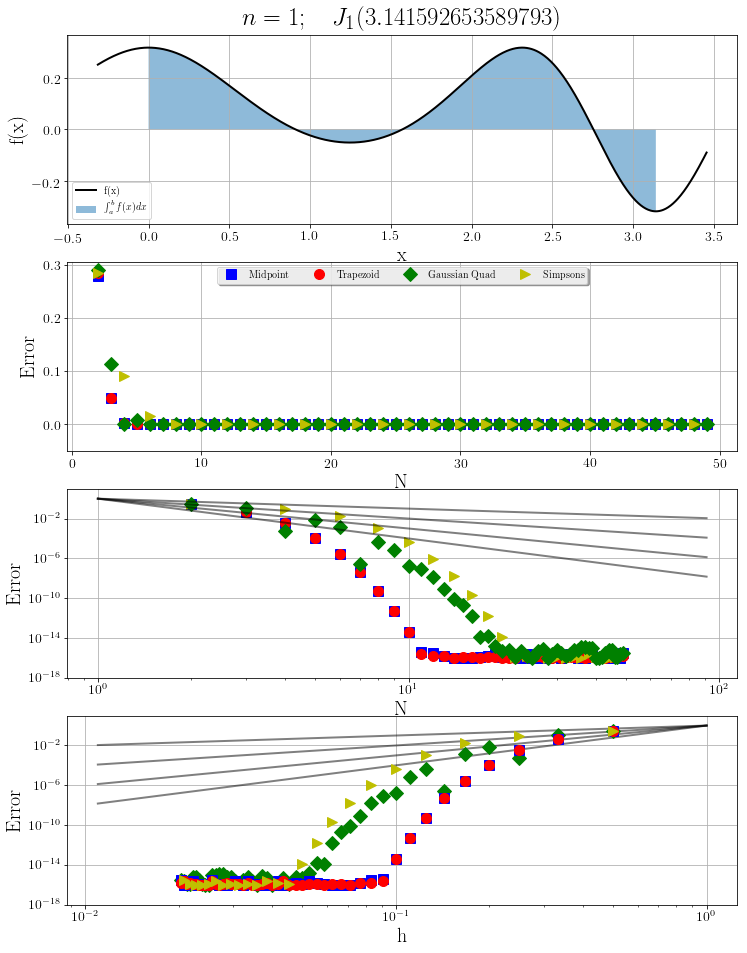

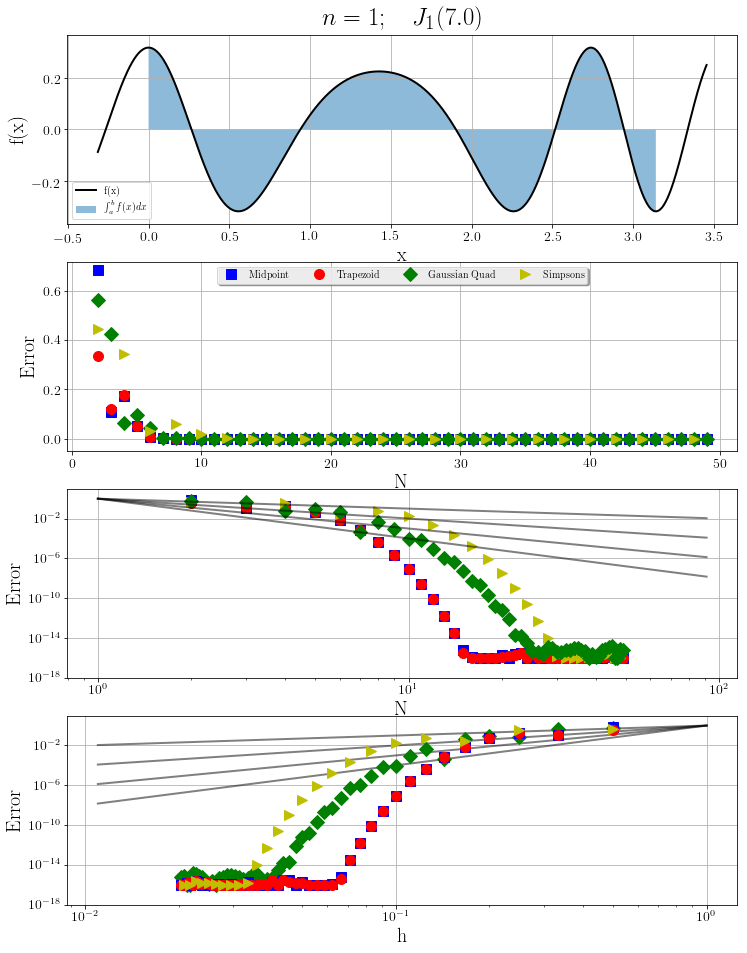

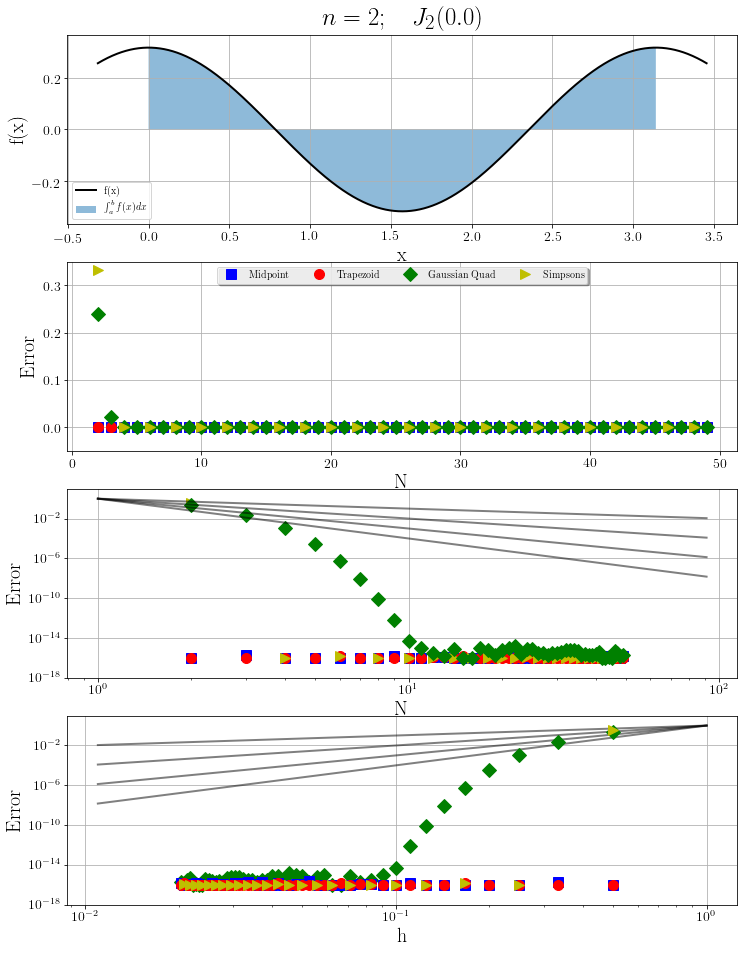

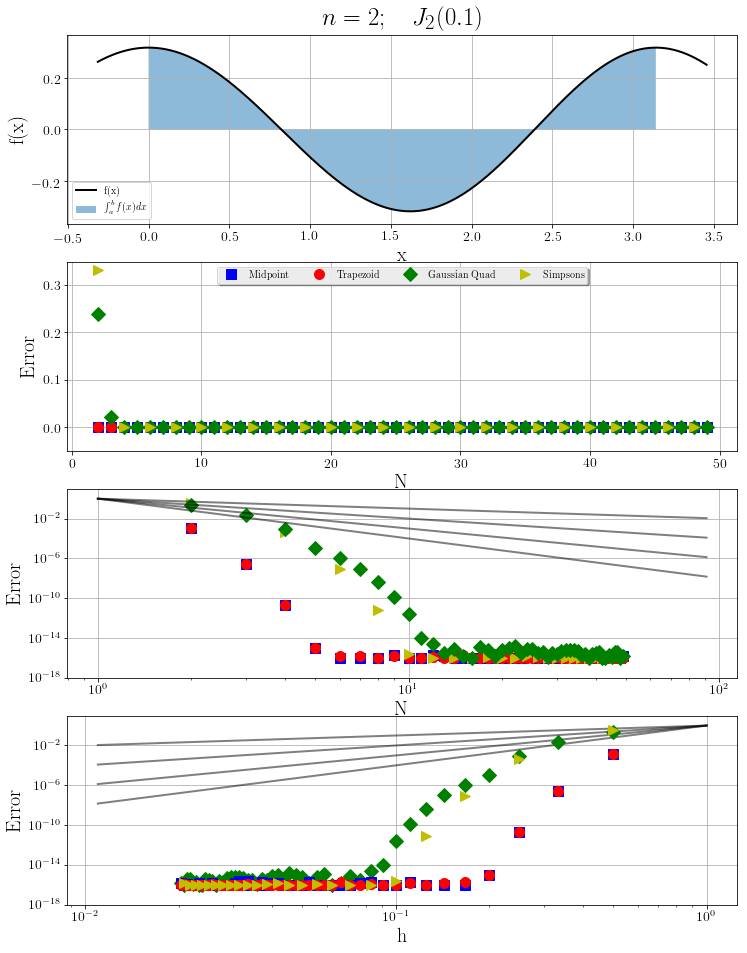

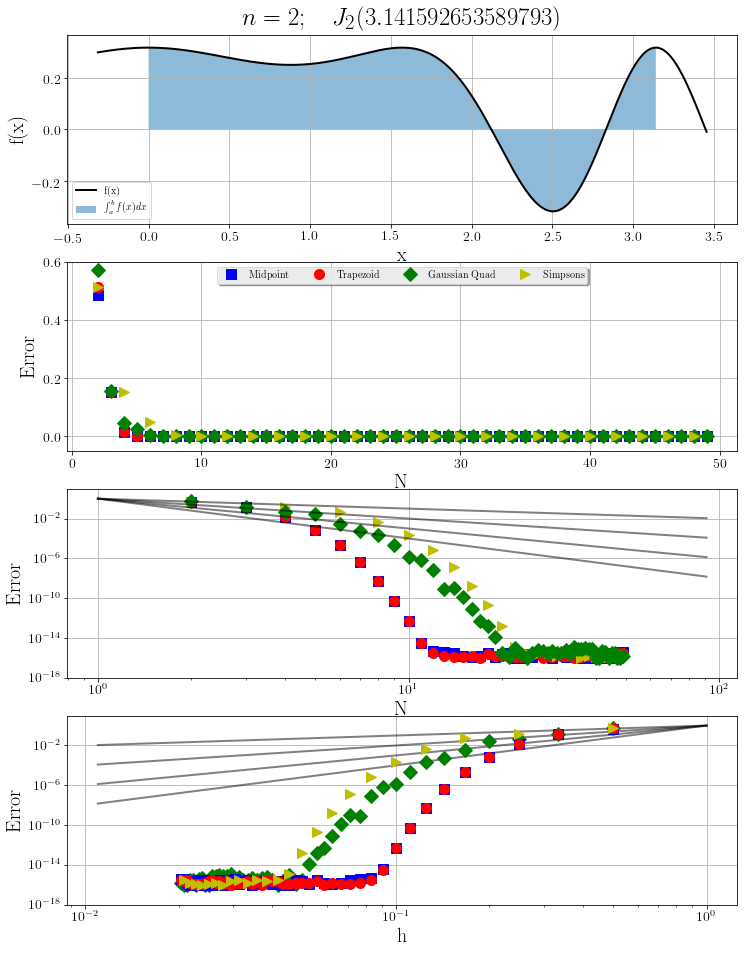

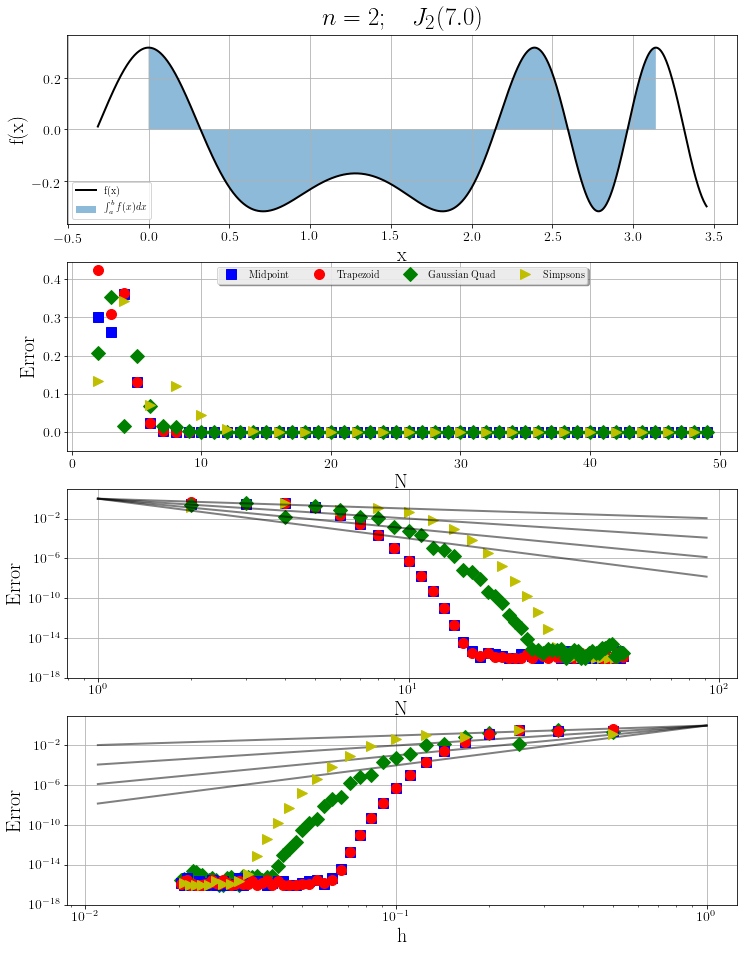

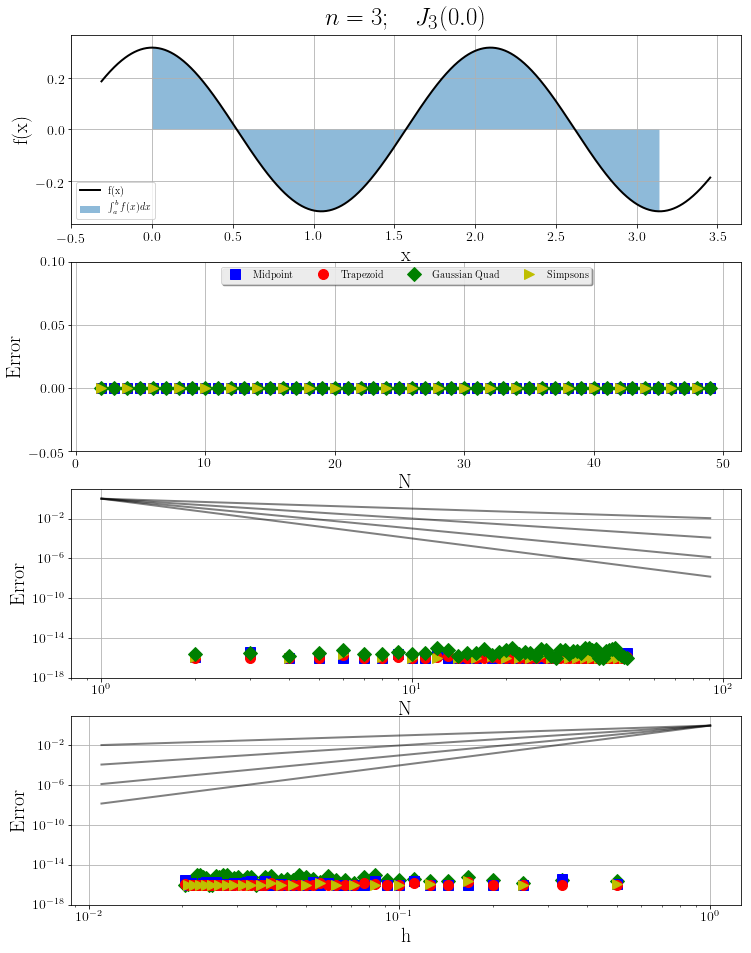

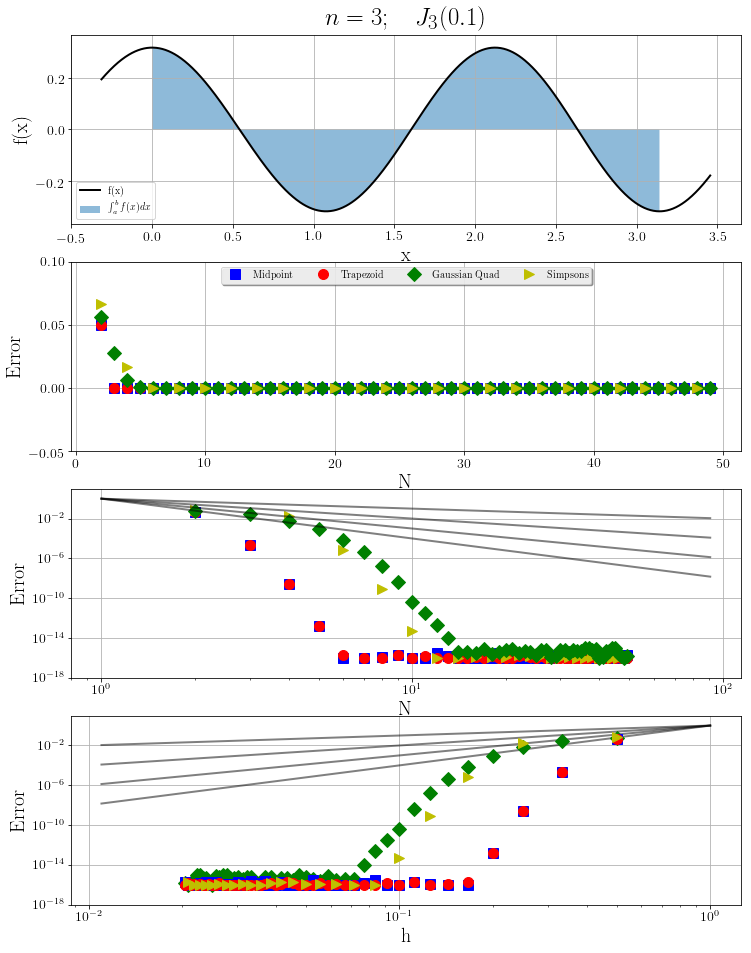

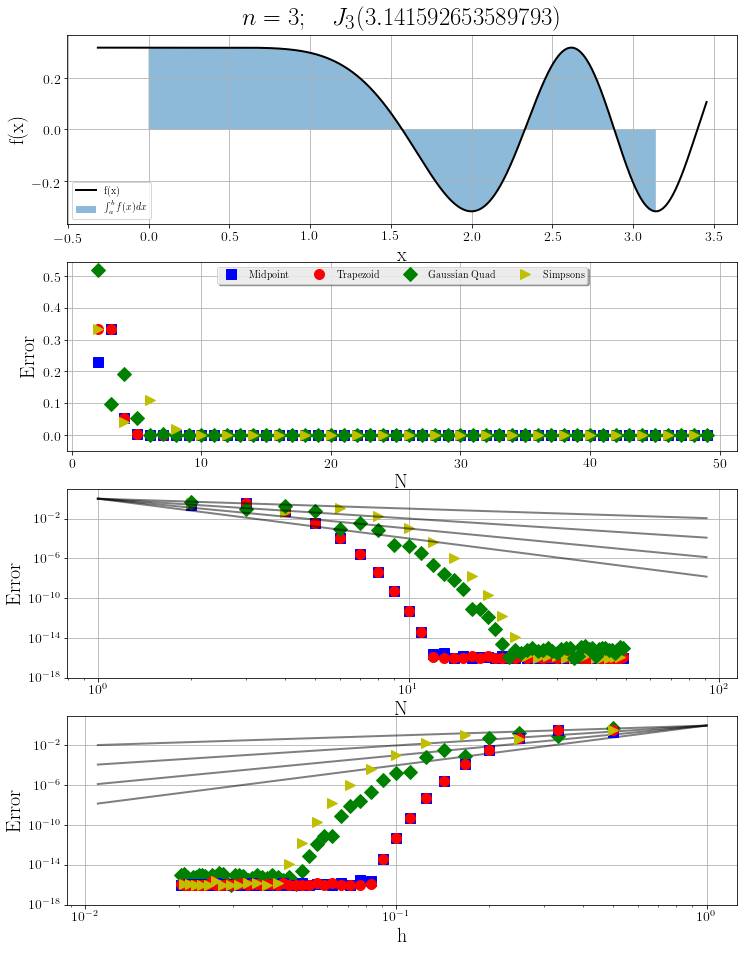

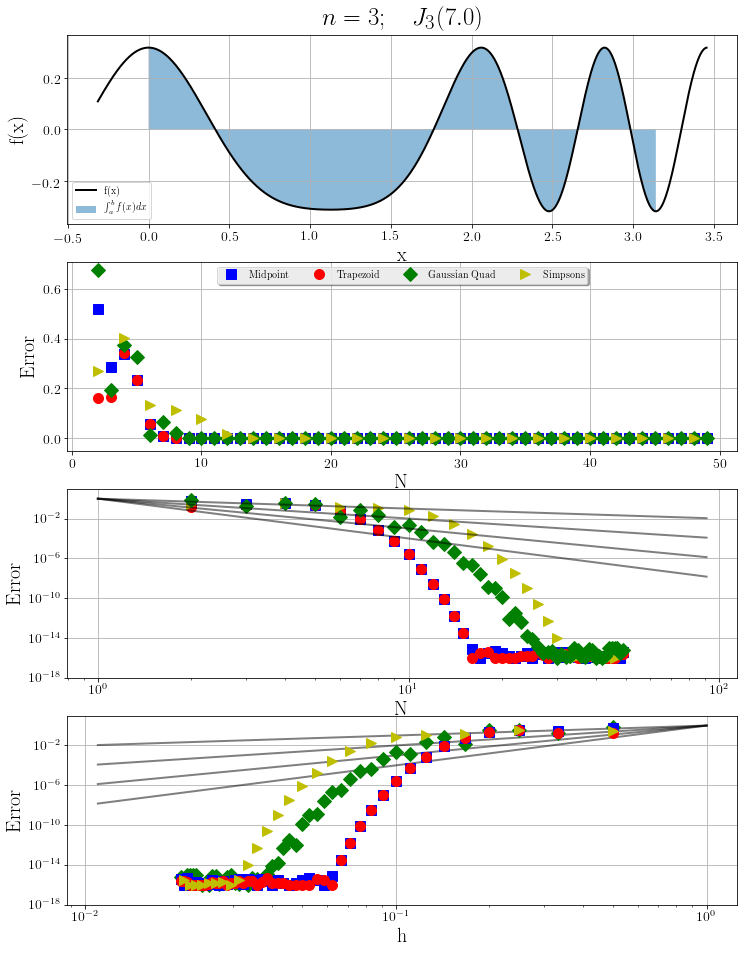

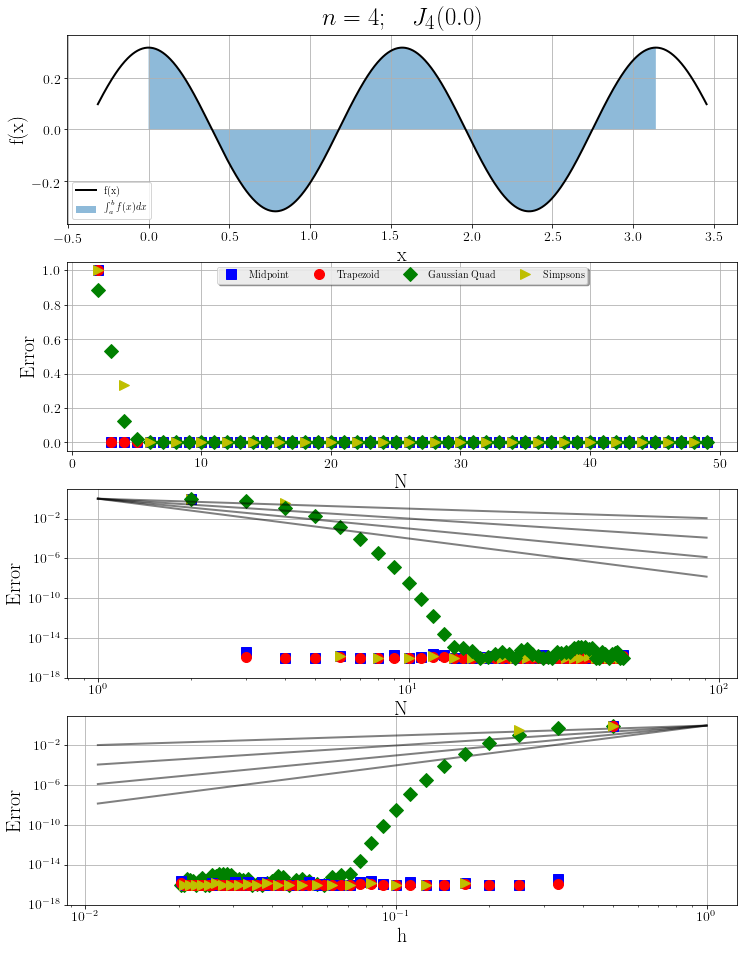

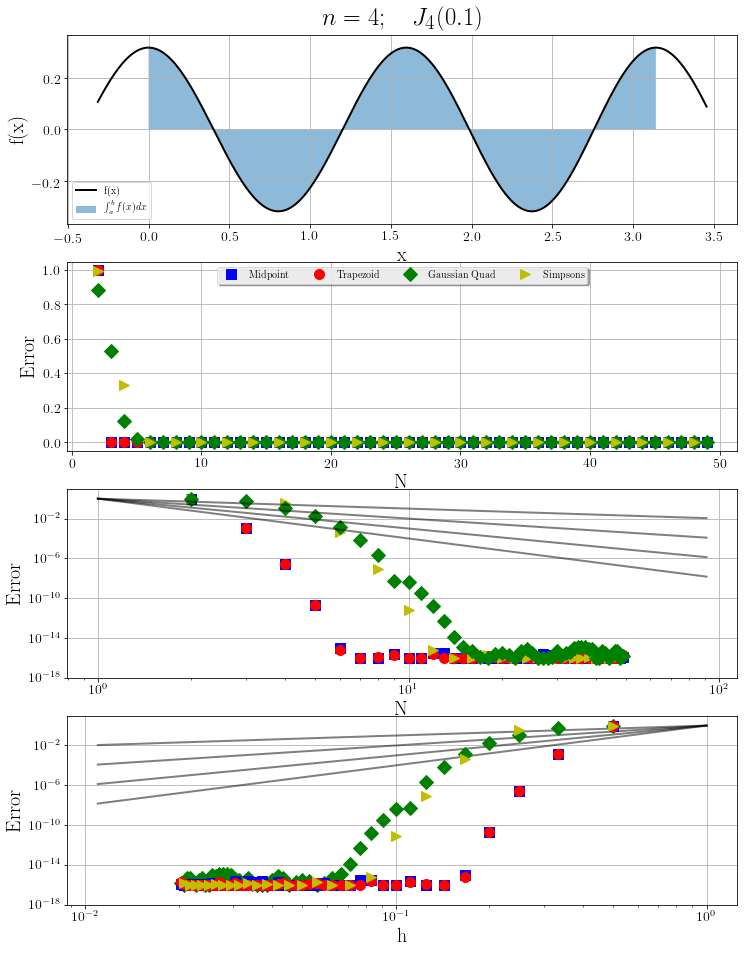

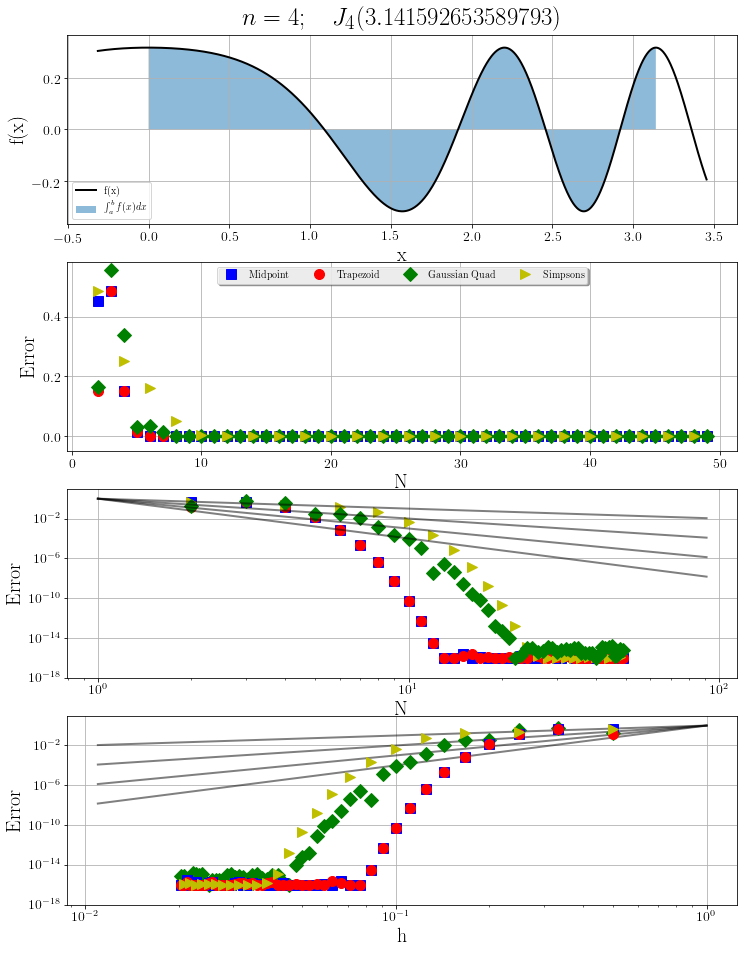

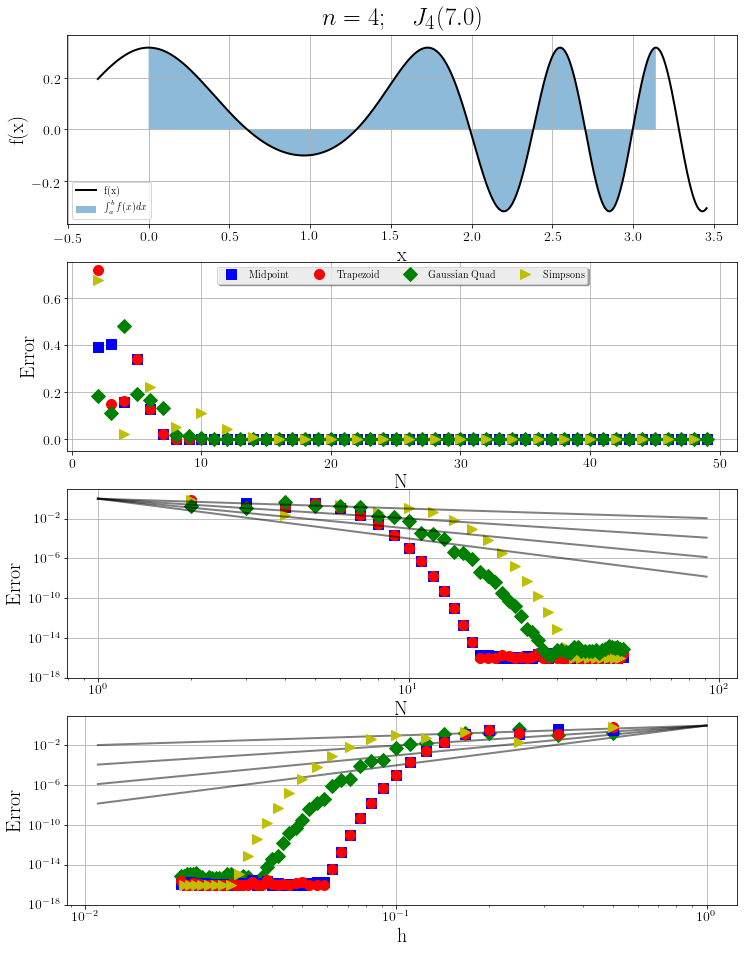

In [14]:
test_x = np.array([0, 0.1, np.pi, 7])
for n in range(5):
    for x in test_x:
        fixed_convergence(myfun, n, x)

#### Resumen de los resultados obtenidos:

---
* $n=0$; $J_0(0)$:
    - Ningún método presenta error (función constante).
* $n=0$; $J_0(0.1)$:
    - El error es bastante poco perceptible.
    - Midpoint y trapezoid son los que convergen más rápido, ya que la función es casi lineal.
    - Saturación aproximadamente desde las 4 evaluaciones.
* $n=0$; $J_0(\pi)$:
    - El error comienza a notarse.
    - Midpoint y trapezoid son los que convergen más rápido.
    - Saturación aproximadamente desde las 10 evaluaciones.
* $n=0$; $J_0(7)$:
    - El comportamiento sigue igual.
    - Saturación aproximadamente desde las 14 evaluaciones.
    - Cabe destacar que los errores decaen de manera exponencial.

---
* $n=1$; $J_1(0)$:
    - Ningún método presenta error.
* $n=1$; $J_1(0.1)$:
    - Los errores siguen comportandose de la misma forma.
    - Midpoint y trapezoid son los que convergen más rápido.
    - Saturación aproximadamente desde las 4 evaluaciones.
* $n=1$; $J_1(\pi)$:
    - Los errores siguen comportandose de la misma forma.
    - Midpoint y trapezoid son los que convergen más rápido.
    - Cuadratura Gaussiana lo hace mejor en un par de puntos.
    - Saturación aproximadamente desde las 10 evaluaciones.
* $n=1$; $J_1(7)$:
    - El comportamiento sigue igual.
    - Saturación aproximadamente desde las 14 evaluaciones.

---
* $n=2$; $J_2(0)$:
    - Solo Gaussiana presenta error, se satura luego de 10 evaluaciones aproximadamente.
    - Simpsons se equivoca solamente en la primera evaluación
* $n=2$; $J_2(0.1)$:
    - Mismo comportamiento ya esperado.
* $n=2$; $J_2(\pi)$:
    - Mismo comportamiento ya esperado.
* $n=2$; $J_2(7)$:
    - Mismo comportamiento ya esperado.

---
* $n=3$; $J_3(0)$:
    - Ningún método presenta error.
* $n=3$; $J_3(0.1)$:
    - Comportamiento esperado, solo que las más rápidas se saturan a partir de 5 evaluaciones.
* $n=3$; $J_3(\pi)$:
    - Comportamiento esperado, solo que las más rápidas se saturan a partir de 11 evaluaciones.
* $n=3$; $J_3(7)$:
    - Comportamiento esperado, solo que las más rápidas se saturan a partir de 15 evaluaciones.

---

tl;dr: Los ganadores son _Midpoint_ y _Trapezoid_, generalmente seguidos de _Gaussian_ y por último _Simpson's_, sin embargo, todos los errores decaen de forma exponencial.

---

### Pregunta 2

Genere gráficos de $J_{n}(x)$, $n\in \{1,2,3\}$, $x\in[0,25]$, utilizando los distintos métodos de integración numérica. Usted decida el número de puntos de integración a utilizar para cada método a partir del análisis de convergencia anterior (asegurece que el tiempo de computación requerido para generar un valor de la gráfica de cada método sea aproximadamente 1 segundo).

---

In [15]:
def time_some_func(myfun, method, n=3, x=15.5, iters=1000):
    init = time.time()
    test_some_func(myfun, method, text, n, x, iters, 0, np.pi)
    end = time.time()
    print("time:", np.round(end - init, 2), "[s]")

In [16]:
n2 = (1, 3, 1)
x2 = (0, 25, 0.1)
evals = (10, 1000, 10)
interact(time_some_func, myfun=fixed(myfun), method=methods, n=n2, x=x2, evals=evals)

A Jupyter Widget

<function __main__.time_some_func>

Podemos ver que en el tiempo de computación influye enormemente utilizar Python debido a su naturaleza de lenguaje interpretado que aparte corre sobre una interfaz web como lo es Jupyter. En el rango en el que estamos trabajando (hasta las 1000 evaluaciones) en general ninguna cuadratura pasa el segundo y según el análisis anterior se saturan mucho más rápido (necesitan una cantidad mucho menor de evaluaciones para converger).

---

### Pregunta 3

Utilizando la mejor y la peor implementación obtenida para el cálculo de la función de Bessel, 
modifique la función **membrana** obtenida tal que muestre en ambos casos la reconstrucción obtenida y el residuo.
Los parámetros que recibe su función **membrana2** deben ser los mismos parámetros que recibe la función actual y el número de puntos de integración para ambos métodos elegidos. Notese que el residuo debe obtenerse sobre una malla fina.
Comente los resultados obtenidos.

---

In [17]:
def _bessel_midpoint(x, myfun, n, evals):
    return midpoint(fixed_fun(myfun, n, x), evals, 0, np.pi)
bessel_midpoint = np.vectorize(_bessel_midpoint)

def _bessel_simpson(x, myfun, n, evals):
    return simpsons(fixed_fun(myfun, n, x), evals, 0, np.pi)
bessel_simpson = np.vectorize(_bessel_simpson)

In [18]:
def membrana2(c, t=0, n=0, m=1, elev=20, azim=150, N=50, otherN=4, myfun=None, best=True):

    if not myfun:
        print("error!")
        return
    
    radius = 1

    fig = plt.figure(figsize=(15,12))
    ax = fig.add_subplot(221, projection='3d')
    
    ax = fig.gca()
    ax.view_init(elev,azim)
    if best:
        ax.set_title(r"\huge Membrana - Midpoint")
    else:
        ax.set_title(r"\huge Membrana - Simpson's")
    
    zero = scipy.special.jn_zeros(n,m)[-1] #Función que obtiene la raiz numero n de la función de Bessel
    r, theta = np.meshgrid(np.linspace(0, radius, N), np.linspace(0, 2*np.pi, N))
    x, y = r*np.cos(theta), r*np.sin(theta)


    real_one_true_bessel = scipy.special.jn(n,zero*r/radius) #Aca se evalua la función de Bessel.
    if best:
        bessel = bessel_midpoint(zero*r/radius, myfun, n, otherN)
    else:
        if otherN % 2 != 0:
            print("Simpson's only alows even values.")
            return
        bessel = bessel_simpson(zero*r/radius, myfun, n, otherN)
    
    z = bessel*np.cos(n*theta)*np.cos(c*zero*t/radius) #Se obtiene el valor de la membrana para cualquier punto x,y
    real_one_true_z = real_one_true_bessel*np.cos(n*theta)*np.cos(c*zero*t/radius)
    
    ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r,rstride=1, cstride=1, linewidth=0)
    ax.set_zlim(-1, 1)
    ax.set_xticks(np.linspace(-1,1,5))
    ax.set_yticks(np.linspace(-1,1,5))
    ax.set_zticks(np.linspace(-1,1,5))
    ax.set_xlabel(r"$x$")
    ax.set_ylabel(r"$y$")
    ax.set_zlabel(r"$z$")
    
    plt.subplot(222)
    plt.contour(x, y, z, 30)
    plt.axis([-1,1,-1,1])
    plt.colorbar()
        
    ax2 = fig.add_subplot(223, projection='3d')
    
    ax2 = fig.gca()
    ax2.view_init(elev,azim)
    if best:
        ax2.set_title(r"\huge Residuo - Midpoint")
    else:
        ax2.set_title(r"\huge Residuo - Simpson's")
    
    ax2.plot_surface(x, y, real_one_true_z - z, cmap=plt.cm.YlGnBu_r,rstride=1, cstride=1, linewidth=0)
    ax2.set_zlim(-1, 1)
    ax2.set_xticks(np.linspace(-1,1,5))
    ax2.set_yticks(np.linspace(-1,1,5))
    ax2.set_zticks(np.linspace(-1,1,5))
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$y$")
    ax2.set_zlabel(r"$z - z'$")
    
    plt.subplot(224)
    plt.contour(x, y, real_one_true_z - z, 30)
    plt.axis([-1,1,-1,1])
    plt.colorbar()
    
    plt.show()

In [19]:
elev_widget = IntSlider(min=0, max=180, step=10, value=20)
azim_widget = IntSlider(min=0, max=360, step=10, value=150)

t = (0,3,0.1)
final_n = (0,10,1)
final_N = (20,90,2)
otherN = (1, 20, 1)
m = (1,10,1)

interact(membrana2, c=fixed(1), t=t, n=final_n, m=m, elev=elev_widget, azim=azim_widget, N=final_N, otherN=otherN, myfun=fixed(myfun), best=True)

A Jupyter Widget

<function __main__.membrana2>

Como hemos notado a lo largo de este trabajo, visualizamos de manera bastante clara que las aproximaciones son buenas, incluso con la cuadratura de Simpson y una baja cantidad de iteraciones tenemos una aproximación bastante cercana a la membrana original. A medida que aumenta el orden de las curvas de Bessel comienza a aumentar el error, sin embargo estas curvas resultan muy manejables bajo la utilización de estos métodos.

---

## Conclusiones
---

* Podemos observar de los primeros análisis que cuando $x=0$ virtualmente no existe error en ningún método, y como cuando $x=0$ lo que quedaba dentro de la integral era tan solo un coseno, podemos concluir que todos los métodos vistos hacen un buen trabajo con las funciones trigonométricas.

* Se concluye que para las curvas de Bessel en general, las cuadraturas son una muy buena aproximación debido a la naturaleza de los errores, los cuales suelen saturar el método a partir de pocas evaluaciones independiente de los parámetros de la curva.

* No siempre la cuadratura Gaussiana es el método más poderoso (en términos de minimizar error), hay que analizar las funciones que estamos integrando ya que si no se trata de polinomios puede que otros métodos hagan un mejor trabajo.
---

## Referencias
---

[Notebook de Cuadratura](https://www.dropbox.com/sh/3eef0gtr3tjnech/AABBOs7zvkVZYhoje8GqaToYa/Jupyter%20notebooks/CC2?dl=0&preview=U2_QuadWorldAll.ipynb)    
[Documentación de Matplotlib](https://matplotlib.org/api/pyplot_api.html)    
[Documentación de SciPy](https://docs.scipy.org/doc/scipy/reference/)

---